# About

The data used is from a Portuguese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information.

#### Dataset : https://archive.ics.uci.edu/ml/datasets/student+performance

## Dataset Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.

## Attribute Information:

<br> 1- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<br> 2- sex - student's sex (binary: 'F' - female or 'M' - male)
<br> 3- age - student's age (numeric: from 15 to 22)
<br> 4- address - student's home address type (binary: 'U' - urban or 'R' - rural)
<br> 5- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
<br> 6- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
<br> 7- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br> 8- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br> 9- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br> 10- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br> 11- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
<br> 12- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
<br> 13- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<br> 14- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<br> 15- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<br> 16- schoolsup - extra educational support (binary: yes or no)
<br> 17- famsup - family educational support (binary: yes or no)
<br> 18- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<br> 19- activities - extra-curricular activities (binary: yes or no)
<br> 20- nursery - attended nursery school (binary: yes or no)
<br> 21- higher - wants to take higher education (binary: yes or no)
<br> 22- internet - Internet access at home (binary: yes or no)
<br> 23- romantic - with a romantic relationship (binary: yes or no)
<br> 24- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<br> 25- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<br> 26- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<br> 27- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br> 28- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br> 29- health - current health status (numeric: from 1 - very bad to 5 - very good)
<br> 30- absences - number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese [TARGETS]:
<br> 31- G1 - first period grade (numeric: from 0 to 20)
<br> 32- G2 - second period grade (numeric: from 0 to 20)
<br> 33- G3 - final grade (numeric: from 0 to 20, output target)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [2]:
## import dataset
df = pd.read_csv("student-mat.csv")

In [5]:
### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
## no nulls in our dataset

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.school.nunique()

2

In [10]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [11]:
# our dataset have been collected from two schools [GP - MS] 

In [13]:
print("students count : ",df.shape[0])

students count :  395


In [14]:
## check family size feature
df.famsize.value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [15]:
## we have 281 students his family have more than three members , and 114 less than 3 

In [16]:
## Check final grade
df.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

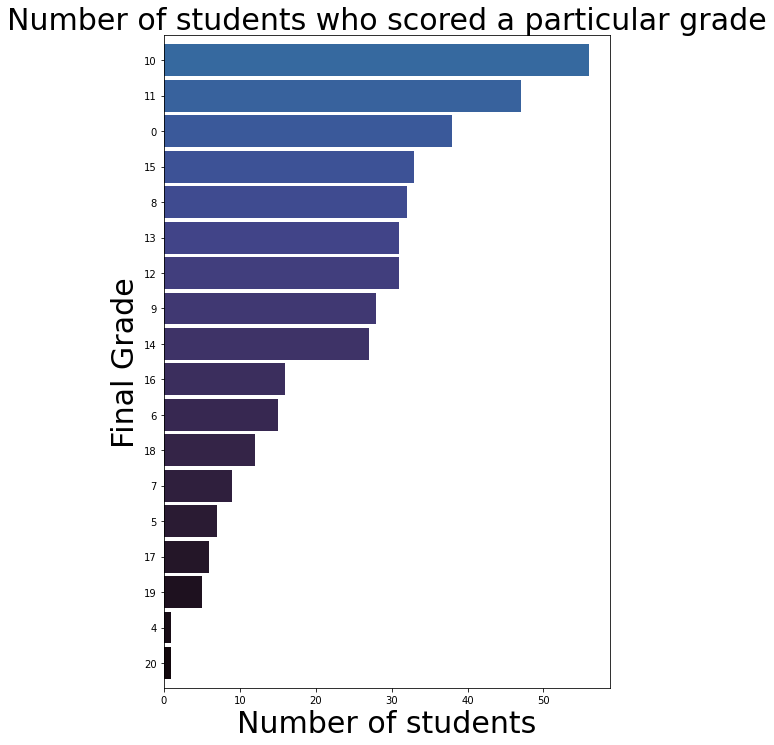

In [20]:
## Show Final grade distribution

plt.subplots(figsize = (8,12))
grade_counter = df.G3.value_counts().sort_values().plot.barh(width = 0.9,color=sns.color_palette('mako',40))
grade_counter.axes.set_title('Number of students who scored a particular grade',fontsize = 30)
grade_counter.set_xlabel('Number of students',fontsize = 30)
grade_counter.set_ylabel('Final Grade',fontsize = 30)
plt.show()

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


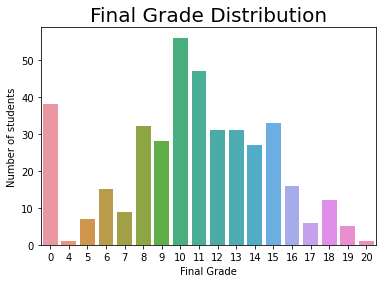

In [23]:
grade_counter = sns.countplot(df.G3)
grade_counter.axes.set_title('Final Grade Distribution',fontsize = 20)
grade_counter.set_xlabel('Final Grade',fontsize = 10)
grade_counter.set_ylabel('Number of students',fontsize = 10)
plt.show()

In [24]:
## the distribution is normal ,and we have almost 40 students got 0 in exam for some reasons

In [ ]:
## Check Sex Feature

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


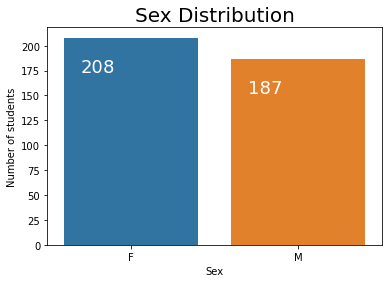

In [32]:
grade_counter = sns.countplot(df.sex)
grade_counter.axes.set_title('Sex Distribution',fontsize = 20)
grade_counter.set_xlabel('Sex',fontsize = 10)
grade_counter.set_ylabel('Number of students',fontsize = 10)
for p in grade_counter.patches:
    grade_counter.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [33]:
## Checking the distribution of Age Feature

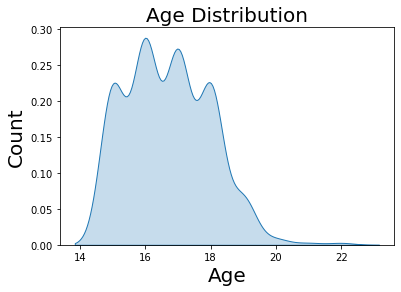

In [34]:
age = sns.kdeplot(df['age'],shade = True)
age.axes.set_title("Age Distribution",fontsize = 20)
age.set_xlabel("Age",fontsize = 20)
age.set_ylabel("Count",fontsize = 20)
plt.show()

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


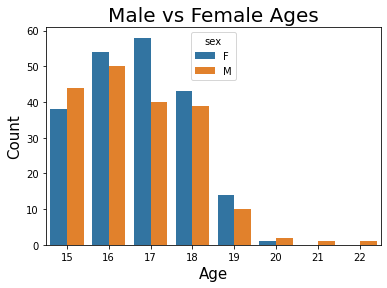

In [37]:
age = sns.countplot('age',hue='sex', data=df)
age.axes.set_title('Male vs Female Ages',fontsize=20)
age.set_xlabel("Age",fontsize=15)
age.set_ylabel("Count",fontsize=15)
plt.show()

The ages seem to be ranging from 15 - 19. The students above that age may not necessarily be outliers .

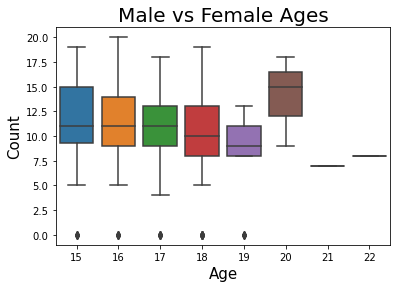

In [38]:
## check age vs grade feature
age_vs_grade = sns.boxplot(x = 'age',
                          y = 'G3',
                          data = df)
age_vs_grade.axes.set_title('Male vs Female Ages',fontsize=20)
age_vs_grade.set_xlabel("Age",fontsize=15)
age_vs_grade.set_ylabel("Count",fontsize=15)
plt.show()

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


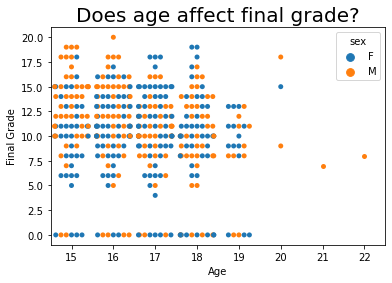

In [39]:
age_vs_grade = sns.swarmplot(x='age', y='G3',hue='sex', data=df)
age_vs_grade.axes.set_title('Does age affect final grade?', fontsize = 20)
age_vs_grade.set_xlabel('Age', fontsize = 10)
age_vs_grade.set_ylabel('Final Grade', fontsize = 10)
plt.show()

In [40]:
## Ages 20,21,22 all of them have 5 points , I think we should not take them in consideration. there is no clear relationship between age and final grade

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


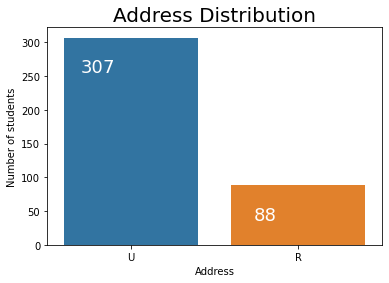

In [41]:
## Check adress feature
address = sns.countplot(df.address)
address.axes.set_title('Address Distribution',fontsize = 20)
address.set_xlabel('Address',fontsize = 10)
address.set_ylabel('Number of students',fontsize = 10)
for p in address.patches:
    address.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


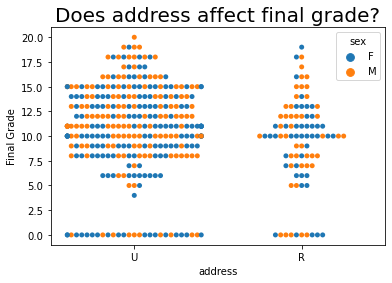

In [42]:
age_vs_address = sns.swarmplot(x='address', y='G3',hue='sex', data=df)
age_vs_address.axes.set_title('Does address affect final grade?', fontsize = 20)
age_vs_address.set_xlabel('address', fontsize = 10)
age_vs_address.set_ylabel('Final Grade', fontsize = 10)
plt.show()

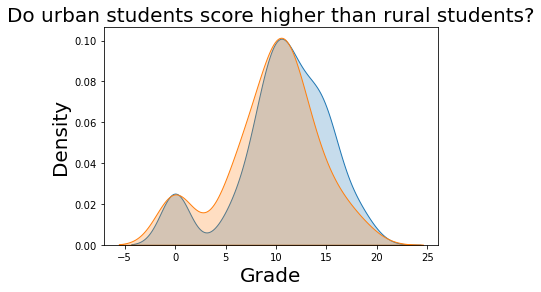

In [44]:
# Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

In [45]:
## there is no much difference between grades based on location

## Find Correlation

In [50]:
df.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [51]:
## the feature above are the numerical features only , so we will encode the categorical features to check thier correlation also